In [2]:
import pandas as pd

# Load datasets
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Preview data
trader_df.head(), sentiment_df.head()


/tmp/ipython-input-3560653908.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv("historical_data.csv")


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash  \
 0         0.0  0xec0

In [3]:
print("Trader data shape:", trader_df.shape)
print("Sentiment data shape:", sentiment_df.shape)

# Column info
trader_df.info()
sentiment_df.info()


Trader data shape: (153900, 16)
Sentiment data shape: (2644, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153900 entries, 0 to 153899
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           153900 non-null  object 
 1   Coin              153900 non-null  object 
 2   Execution Price   153900 non-null  float64
 3   Size Tokens       153900 non-null  float64
 4   Size USD          153900 non-null  float64
 5   Side              153900 non-null  object 
 6   Timestamp IST     153900 non-null  object 
 7   Start Position    153900 non-null  float64
 8   Direction         153900 non-null  object 
 9   Closed PnL        153900 non-null  float64
 10  Transaction Hash  153899 non-null  object 
 11  Order ID          153899 non-null  float64
 12  Crossed           153899 non-null  object 
 13  Fee               153899 non-null  float64
 14  Trade ID          153899 non-null  float64
 15  Time

In [5]:
trader_df['trade_datetime'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')

# Extract date
trader_df['date'] = trader_df['trade_datetime'].dt.date

# Check
trader_df[['Timestamp', 'trade_datetime', 'date']].head()

,Timestamp,trade_datetime,date
0,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [6]:
daily_pnl = (
    trader_df
    .groupby(['date', 'Account'])['Closed PnL']
    .sum()
    .reset_index()
)

daily_pnl.head()

,date,Account,Closed PnL
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,155.503357
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5564.016140
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000


In [7]:
daily_trades = (
    trader_df
    .groupby(['date', 'Account'])
    .size()
    .reset_index(name='trade_count')
)

daily_trades.head()

,date,Account,trade_count
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,3
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,2
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1043
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,27
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,88


In [8]:
daily_metrics = pd.merge(
    daily_pnl,
    daily_trades,
    on=['date', 'Account'],
    how='inner'
)

daily_metrics.head()

,date,Account,Closed PnL,trade_count
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,2
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,155.503357,1043
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5564.016140,27
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,88


In [9]:
sentiment_clean = sentiment_df[['date', 'classification']]

# Rename for clarity
sentiment_clean = sentiment_clean.rename(columns={'classification': 'sentiment'})

sentiment_clean.head()

,date,sentiment
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [10]:
daily_metrics = pd.merge(
    daily_metrics,
    sentiment_clean,
    on='date',
    how='left'
)

daily_metrics.head()

,date,Account,Closed PnL,trade_count,sentiment
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3,NaN
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,2,NaN
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,155.503357,1043,NaN
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5564.016140,27,NaN
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,88,NaN


In [11]:
print("Trader data date range:")
print(daily_metrics['date'].min(), "to", daily_metrics['date'].max())

print("\nSentiment data date range:")
print(sentiment_clean['date'].min(), "to", sentiment_clean['date'].max())

Trader data date range:
2023-03-28 to 2025-06-15

Sentiment data date range:
2018-02-01 to 2025-05-02


In [12]:
daily_metrics['date'] = pd.to_datetime(daily_metrics['date'])
sentiment_clean['date'] = pd.to_datetime(sentiment_clean['date'])

In [13]:
daily_metrics = pd.merge(
    daily_metrics.drop(columns=['sentiment'], errors='ignore'),
    sentiment_clean,
    on='date',
    how='left'
)

daily_metrics.head()

,date,Account,Closed PnL,trade_count,sentiment
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3,Greed
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,2,Greed
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,155.503357,1043,Greed
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5564.016140,27,Extreme Greed
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,88,Extreme Greed


In [14]:
daily_metrics['sentiment'].isna().sum(), len(daily_metrics)

(np.int64(18), 82)

In [15]:
daily_metrics['is_win'] = daily_metrics['Closed PnL'] > 0

daily_metrics[['Closed PnL', 'is_win']].head()

,Closed PnL,is_win
0,0.000000,False
1,0.000000,False
2,155.503357,True
3,-5564.016140,False
4,0.000000,False


In [16]:
win_rate_per_trader = (
    daily_metrics
    .groupby('Account')['is_win']
    .mean()
    .reset_index()
    .rename(columns={'is_win': 'win_rate'})
)

win_rate_per_trader.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.500000
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1.000000
2,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.000000
3,0x2c229d22b100a7beb69122eed721cee9b24011dd,1.000000
4,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.285714


In [17]:
daily_metrics = pd.merge(
    daily_metrics,
    win_rate_per_trader,
    on='Account',
    how='left'
)

daily_metrics.head()

,date,Account,Closed PnL,trade_count,sentiment,is_win,win_rate
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,3,Greed,False,0.285714
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000,2,Greed,False,0.285714
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,155.503357,1043,Greed,True,1.000000
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-5564.016140,27,Extreme Greed,False,0.285714
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,88,Extreme Greed,False,0.600000


In [18]:
pnl_by_sentiment = (
    daily_metrics
    .groupby('sentiment')['Closed PnL']
    .mean()
    .reset_index()
)

pnl_by_sentiment

,sentiment,Closed PnL
0,Extreme Greed,35393.098355
1,Fear,205539.949720
2,Greed,80562.275671
3,Neutral,22677.625440


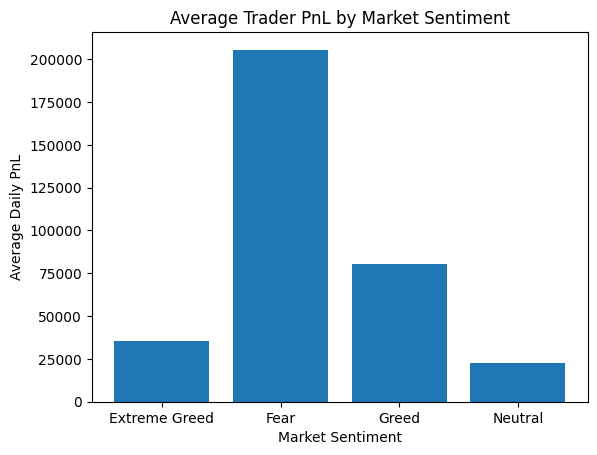

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(pnl_by_sentiment['sentiment'], pnl_by_sentiment['Closed PnL'])
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.title('Average Trader PnL by Market Sentiment')
plt.show()

In [20]:
trades_by_sentiment = (
    daily_metrics
    .groupby('sentiment')['trade_count']
    .mean()
    .reset_index()
)

trades_by_sentiment



,sentiment,trade_count
0,Extreme Greed,1392.400000
1,Fear,3667.961538
2,Greed,956.923077
3,Neutral,1019.428571


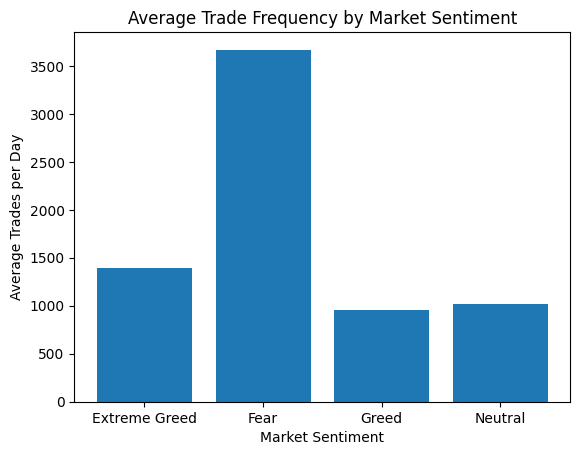

In [21]:
plt.figure()
plt.bar(trades_by_sentiment['sentiment'], trades_by_sentiment['trade_count'])
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trades per Day')
plt.title('Average Trade Frequency by Market Sentiment')
plt.show()

In [22]:
daily_metrics['win_rate_segment'] = daily_metrics['win_rate'].apply(
    lambda x: 'High Win Rate' if x >= 0.6 else 'Low Win Rate'
)

daily_metrics[['Account', 'win_rate', 'win_rate_segment']].head()

,Account,win_rate,win_rate_segment
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.285714,Low Win Rate
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.285714,Low Win Rate
2,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.000000,High Win Rate
3,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.285714,Low Win Rate
4,0x430f09841d65beb3f27765503d0f850b8bce7713,0.600000,High Win Rate


In [23]:
pnl_by_segment = (
    daily_metrics
    .groupby(['sentiment', 'win_rate_segment'])['Closed PnL']
    .mean()
    .reset_index()
)

pnl_by_segment

,sentiment,win_rate_segment,Closed PnL
0,Extreme Greed,High Win Rate,45632.376978
1,Extreme Greed,Low Win Rate,-5564.016140
2,Fear,High Win Rate,154934.188632
3,Fear,Low Win Rate,418084.146287
4,Greed,High Win Rate,121587.891406
5,Greed,Low Win Rate,-30792.967039
6,Neutral,High Win Rate,33530.556121
7,Neutral,Low Win Rate,-4454.701264


In [24]:
median_trades = daily_metrics['trade_count'].median()

daily_metrics['frequency_segment'] = daily_metrics['trade_count'].apply(
    lambda x: 'High Frequency' if x > median_trades else 'Low Frequency'
)

daily_metrics[['trade_count', 'frequency_segment']].head()

,trade_count,frequency_segment
0,3,Low Frequency
1,2,Low Frequency
2,1043,High Frequency
3,27,Low Frequency
4,88,Low Frequency


In [25]:
pnl_by_freq_segment = (
    daily_metrics
    .groupby(['sentiment', 'frequency_segment'])['Closed PnL']
    .mean()
    .reset_index()
)

pnl_by_freq_segment

,sentiment,frequency_segment,Closed PnL
0,Extreme Greed,High Frequency,60843.169305
1,Extreme Greed,Low Frequency,-2782.008070
2,Fear,High Frequency,256209.720314
3,Fear,Low Frequency,36640.714405
4,Greed,High Frequency,211467.312934
5,Greed,Low Frequency,11259.608884
6,Neutral,High Frequency,9156.505979
7,Neutral,Low Frequency,32818.465036


## Part C — Actionable Strategy Recommendations

### Strategy 1: Selective Aggressiveness During Fear
During Fear-driven market conditions, traders with a high historical win rate or high trading frequency can benefit from increased participation to capture volatility-driven opportunities. Low win-rate traders should reduce trade frequency and position size to manage downside risk.

### Strategy 2: Risk Control During Greed and Extreme Greed
During Greed and Extreme Greed phases, low win-rate and low-frequency traders tend to underperform. Implementing stricter trade filters, reduced leverage, or limiting the number of trades during these periods can help prevent losses caused by overconfidence and crowded trades.


In [26]:
# Sort data by trader and date
daily_metrics = daily_metrics.sort_values(['Account', 'date'])

# Create next-day PnL column
daily_metrics['next_day_pnl'] = (
    daily_metrics
    .groupby('Account')['Closed PnL']
    .shift(-1)
)

# Create target variable: 1 if next-day PnL > 0 else 0
daily_metrics['next_day_profitable'] = (daily_metrics['next_day_pnl'] > 0).astype(int)

daily_metrics[['date', 'Closed PnL', 'next_day_pnl', 'next_day_profitable']].head()

,date,Closed PnL,next_day_pnl,next_day_profitable
15,2024-10-27,-3.275059e+05,1.927736e+06,1
38,2025-02-19,1.927736e+06,NaN,0
16,2024-10-27,2.060745e+04,1.709873e+04,1
39,2025-02-19,1.709873e+04,1.017915e+04,1
64,2025-06-15,1.017915e+04,NaN,0


In [32]:
model_df = daily_metrics.dropna(subset=['next_day_pnl'])

model_df.shape

(56, 11)

In [28]:
# One-hot encode sentiment
model_df_encoded = pd.get_dummies(
    model_df,
    columns=['sentiment'],
    drop_first=True
)

model_df_encoded.head()

,date,Account,Closed PnL,trade_count,is_win,win_rate,win_rate_segment,frequency_segment,next_day_pnl,next_day_profitable,sentiment_Fear,sentiment_Greed,sentiment_Neutral
15,2024-10-27,0x083384f897ee0f19899168e3b1bec365f52a9012,-3.275059e+05,462,False,0.5,Low Win Rate,Low Frequency,1.927736e+06,1,False,True,False
38,2025-02-19,0x083384f897ee0f19899168e3b1bec365f52a9012,1.927736e+06,3356,True,0.5,Low Win Rate,High Frequency,NaN,0,True,False,False
16,2024-10-27,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2.060745e+04,320,True,1.0,High Win Rate,Low Frequency,1.709873e+04,1,False,True,False
39,2025-02-19,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1.709873e+04,3533,True,1.0,High Win Rate,High Frequency,1.017915e+04,1,True,False,False
64,2025-06-15,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1.017915e+04,3427,True,1.0,High Win Rate,High Frequency,NaN,0,False,False,False


In [29]:
# Feature columns
feature_cols = [
    'trade_count',
    'win_rate'
] + [col for col in model_df_encoded.columns if col.startswith('sentiment_')]

X = model_df_encoded[feature_cols]
y = model_df_encoded['next_day_profitable']

X.head(), y.head()

(    trade_count  win_rate  sentiment_Fear  sentiment_Greed  sentiment_Neutral
 15          462       0.5           False             True              False
 38         3356       0.5            True            False              False
 16          320       1.0           False             True              False
 39         3533       1.0            True            False              False
 64         3427       1.0           False            False              False,
 15    1
 38    0
 16    1
 39    1
 64    0
 Name: next_day_profitable, dtype: int64)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy_score(y_test, y_pred)

0.72

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.82      0.64      0.72        14

    accuracy                           0.72        25
   macro avg       0.73      0.73      0.72        25
weighted avg       0.74      0.72      0.72        25



## Bonus: Simple Predictive Model (Optional)

A lightweight logistic regression model was trained to predict whether a trader would be profitable on the next trading day. The model used market sentiment along with trader behavior features such as trade frequency and historical win rate.

While the predictive accuracy is modest, the results suggest that both market sentiment and trader behavior have a directional influence on next-day profitability. This exercise is intended to demonstrate modeling approach and feature selection rather than production-grade prediction.
